In [13]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model_path = 'lung_detection_dblstm.h5'
loaded_model = load_model(model_path)

# Define your custom class names
class_names = ['CARDIOMEGALY', 'COVID', 'NORMAL', 'PNEUMONIA', 'PNEUMOTHORAX', 'TUBERCULOSIS']

# Path to the image you want to predict
image_path = r"C:\Users\asuto\Desktop\intern ship 2\lung detection\archive\test-20230326T155708Z-001\test\COVID\COVID-19 (8).jpeg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = np.expand_dims(img_array, axis=1)  # Add a time dimension
img_array /= 255.0  # Rescale pixel values to [0, 1]

# Make a prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get the predicted class name from the custom class names list
predicted_class_name = class_names[predicted_class]

# Display the predicted class
print(f"Predicted class: {predicted_class_name}")

1/1 [==============================] - 0s 423ms/step
Predicted class: COVID


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import DenseNet121, InceptionV3

# Define ensemble model using DenseNet121 and InceptionV3
def ensemble_model(input_shape=(224, 224, 3), num_classes=6):
    # Load pre-trained DenseNet121 model
    densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in densenet_model.layers:
        layer.trainable = False

    # Load pre-trained InceptionV3 model
    inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in inception_model.layers:
        layer.trainable = False

    # Define input layer
    input_layer = layers.Input(shape=input_shape)

    # Extract features using DenseNet121
    densenet_features = densenet_model(input_layer)
    densenet_features = layers.GlobalAveragePooling2D()(densenet_features)

    # Extract features using InceptionV3
    inception_features = inception_model(input_layer)
    inception_features = layers.GlobalAveragePooling2D()(inception_features)

    # Concatenate features
    merged_features = layers.Concatenate()([densenet_features, inception_features])

    # Add a fully connected layer
    merged_features = layers.Dense(512, activation='relu')(merged_features)

    # Output layer
    output = layers.Dense(num_classes, activation='softmax')(merged_features)

    # Create model
    model = Model(inputs=input_layer, outputs=output)

    return model

# Define data directories
train_dir = r'D:\Downloads\Dataset\train'
val_dir = r'D:\Downloads\Dataset\val'
test_dir = r'D:\Downloads\Dataset\test'
image_size = (224, 224)
batch_size = 32

# Create data generators for training, validation, and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

# Load ensemble model
model = ensemble_model(input_shape=image_size + (3,), num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 16050 images belonging to 6 classes.
Found 4104 images belonging to 6 classes.
Epoch 1/10
200/200 [==============================] - 1421s 7s/step - loss: 1.1096 - accuracy: 0.6116 - val_loss: 0.8752 - val_accuracy: 0.6674
Epoch 2/10
200/200 [==============================] - 1329s 7s/step - loss: 0.7986 - accuracy: 0.7005 - val_loss: 0.7360 - val_accuracy: 0.7381
Epoch 3/10
200/200 [==============================] - 1348s 7s/step - loss: 0.7471 - accuracy: 0.7252 - val_loss: 0.6498 - val_accuracy: 0.7610
Epoch 4/10
200/200 [==============================] - 1319s 7s/step - loss: 0.6872 - accuracy: 0.7484 - val_loss: 0.6919 - val_accuracy: 0.7398
Epoch 5/10
200/200 [==============================] - 21040s 106s/step - loss: 0.6582 - accuracy: 0.7552 - val_loss: 0.5954 - val_accuracy: 0.7788
Epoch 6/10
200/200 [==============================] - 1341s 7s/step - loss: 0.6446 - accuracy: 0.7689 - val_loss: 0.5837 - val_accuracy: 0.7863
Epoch 7/10
200/200 [============================

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import DenseNet121, InceptionV3

# Define ensemble model using DenseNet121 and InceptionV3
def ensemble_model(input_shape=(224, 224, 3), num_classes=6):
    # Load pre-trained DenseNet121 model
    densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in densenet_model.layers:
        layer.trainable = False

    # Load pre-trained InceptionV3 model
    inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in inception_model.layers:
        layer.trainable = False

    # Define input layer
    input_layer = layers.Input(shape=input_shape)

    # Extract features using DenseNet121
    densenet_features = densenet_model(input_layer)
    densenet_features = layers.GlobalAveragePooling2D()(densenet_features)

    # Extract features using InceptionV3
    inception_features = inception_model(input_layer)
    inception_features = layers.GlobalAveragePooling2D()(inception_features)

    # Concatenate features
    merged_features = layers.Concatenate()([densenet_features, inception_features])

    # Add a fully connected layer
    merged_features = layers.Dense(512, activation='relu')(merged_features)

    # Output layer
    output = layers.Dense(num_classes, activation='softmax')(merged_features)

    # Create model
    model = Model(inputs=input_layer, outputs=output)

    return model

# Define data directories
train_dir = r'D:\P_126\data_idumfc\preprocessed_train'
val_dir = r'D:\P_126\data_idumfc\preprocessed_val'
test_dir = r'D:\P_126\data_idumfc\preprocessed_test'
image_size = (224, 224)
batch_size = 32

# Create data generators for training, validation, and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

# Load ensemble model
model = ensemble_model(input_shape=image_size + (3,), num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=30,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 16050 images belonging to 6 classes.
Found 4104 images belonging to 6 classes.
Epoch 1/30
200/200 [==============================] - 1414s 7s/step - loss: 1.1564 - accuracy: 0.6092 - val_loss: 0.7778 - val_accuracy: 0.7066
Epoch 2/30
200/200 [==============================] - 1333s 7s/step - loss: 0.8006 - accuracy: 0.7015 - val_loss: 0.7379 - val_accuracy: 0.7193
Epoch 3/30
200/200 [==============================] - 1326s 7s/step - loss: 0.7194 - accuracy: 0.7334 - val_loss: 0.7084 - val_accuracy: 0.7385
Epoch 4/30
200/200 [==============================] - 1326s 7s/step - loss: 0.6753 - accuracy: 0.7504 - val_loss: 0.6703 - val_accuracy: 0.7461
Epoch 5/30
200/200 [==============================] - 1327s 7s/step - loss: 0.6513 - accuracy: 0.7520 - val_loss: 0.6855 - val_accuracy: 0.7417
Epoch 6/30
200/200 [==============================] - 1334s 7s/step - loss: 0.6308 - accuracy: 0.7658 - val_loss: 0.6118 - val_accuracy: 0.7666
Epoch 7/30
200/200 [==============================]

In [8]:
from sklearn.metrics import classification_report
import numpy as np
# Generate predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)


129/129 [==============================] - 522s 4s/step
              precision    recall  f1-score   support

CARDIOMEGALY       0.16      0.15      0.16       685
       COVID       0.19      0.14      0.16       685
      NORMAL       0.16      0.17      0.16       685
   PNEUMONIA       0.16      0.14      0.15       685
PNEUMOTHORAX       0.16      0.17      0.16       685
TUBERCULOSIS       0.16      0.21      0.18       685

    accuracy                           0.16      4110
   macro avg       0.17      0.16      0.16      4110
weighted avg       0.17      0.16      0.16      4110



In [9]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)
print("Cohen's Kappa:", kappa)

# Calculate False Discovery Rate (FDR)
# FDR = FP / (TP + FP)
# where FP is False Positives, TP is True Positives
confusion_matrix = tf.math.confusion_matrix(true_labels, predicted_labels).numpy()
false_positives = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
true_positives = np.diag(confusion_matrix)
fdr = false_positives / (true_positives + false_positives)
print("False Discovery Rate (FDR):", fdr)

# Calculate Positive Predictive Value (PPV)
# PPV = TP / (TP + FN)
# where FN is False Negatives
false_negatives = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
ppv = true_positives / (true_positives + false_negatives)
print("Positive Predictive Value (PPV):", ppv)


Cohen's Kappa: -0.0032116788321168155
False Discovery Rate (FDR): [0.8369906  0.80923695 0.8440367  0.84026622 0.83783784 0.83902977]
Positive Predictive Value (PPV): [0.15182482 0.13868613 0.17372263 0.14014599 0.16642336 0.21313869]


129/129 [==============================] - 514s 4s/step


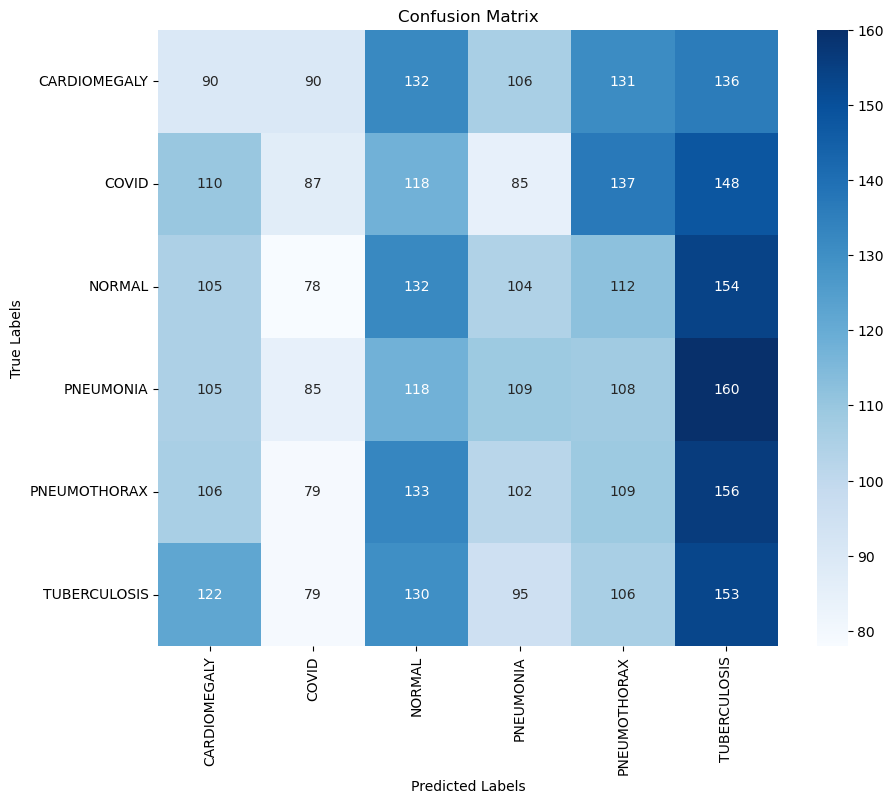

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true and predicted labels
true_labels = test_generator.classes
predicted_labels = model.predict(test_generator).argmax(axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [11]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import DenseNet121, InceptionV3

# Define ensemble model using DenseNet121 and InceptionV3
def ensemble_model(input_shape=(224, 224, 3), num_classes=6):
    # Load pre-trained DenseNet121 model
    densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in densenet_model.layers:
        layer.trainable = False

    # Load pre-trained InceptionV3 model
    inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in inception_model.layers:
        layer.trainable = False

    # Define input layer
    input_layer = layers.Input(shape=input_shape)

    # Extract features using DenseNet121
    densenet_features = densenet_model(input_layer)
    densenet_features = layers.GlobalAveragePooling2D()(densenet_features)

    # Extract features using InceptionV3
    inception_features = inception_model(input_layer)
    inception_features = layers.GlobalAveragePooling2D()(inception_features)

    # Concatenate features
    merged_features = layers.Concatenate()([densenet_features, inception_features])

    # Add a fully connected layer
    merged_features = layers.Dense(512, activation='relu')(merged_features)

    # Output layer
    output = layers.Dense(num_classes, activation='softmax')(merged_features)

    # Create model
    model = Model(inputs=input_layer, outputs=output)

    return model

# Define data directories
train_dir = r'D:\P_126\data_idumfc\preprocessed_train'
val_dir = r'D:\P_126\data_idumfc\preprocessed_val'
test_dir = r'D:\P_126\data_idumfc\preprocessed_test'
image_size = (224, 224)
batch_size = 32

# Create data generators for training, validation, and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

# Load ensemble model
model = ensemble_model(input_shape=image_size + (3,), num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 16050 images belonging to 6 classes.
Found 4104 images belonging to 6 classes.
Epoch 1/20
200/200 [==============================] - 1366s 7s/step - loss: 1.2138 - accuracy: 0.5878 - val_loss: 0.7814 - val_accuracy: 0.7044
Epoch 2/20
200/200 [==============================] - 1321s 7s/step - loss: 0.7979 - accuracy: 0.7075 - val_loss: 0.7979 - val_accuracy: 0.6845
Epoch 3/20
200/200 [==============================] - 1325s 7s/step - loss: 0.7459 - accuracy: 0.7198 - val_loss: 0.6520 - val_accuracy: 0.7627
Epoch 4/20
200/200 [==============================] - 1318s 7s/step - loss: 0.6588 - accuracy: 0.7618 - val_loss: 0.7040 - val_accuracy: 0.7420
Epoch 5/20
200/200 [==============================] - 1317s 7s/step - loss: 0.6581 - accuracy: 0.7579 - val_loss: 0.6229 - val_accuracy: 0.7666
Epoch 6/20
200/200 [==============================] - 1306s 7s/step - loss: 0.6580 - accuracy: 0.7635 - val_loss: 0.6137 - val_accuracy: 0.7758
Epoch 7/20
200/200 [==============================]

In [12]:
from sklearn.metrics import classification_report
import numpy as np
# Generate predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)


129/129 [==============================] - 513s 4s/step
              precision    recall  f1-score   support

CARDIOMEGALY       0.15      0.18      0.17       685
       COVID       0.17      0.11      0.14       685
      NORMAL       0.17      0.19      0.18       685
   PNEUMONIA       0.16      0.14      0.15       685
PNEUMOTHORAX       0.17      0.15      0.16       685
TUBERCULOSIS       0.17      0.22      0.19       685

    accuracy                           0.17      4110
   macro avg       0.17      0.17      0.16      4110
weighted avg       0.17      0.17      0.16      4110



In [13]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)
print("Cohen's Kappa:", kappa)

# Calculate False Discovery Rate (FDR)
# FDR = FP / (TP + FP)
# where FP is False Positives, TP is True Positives
confusion_matrix = tf.math.confusion_matrix(true_labels, predicted_labels).numpy()
false_positives = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
true_positives = np.diag(confusion_matrix)
fdr = false_positives / (true_positives + false_positives)
print("False Discovery Rate (FDR):", fdr)

# Calculate Positive Predictive Value (PPV)
# PPV = TP / (TP + FN)
# where FN is False Negatives
false_negatives = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
ppv = true_positives / (true_positives + false_negatives)
print("Positive Predictive Value (PPV):", ppv)


Cohen's Kappa: -0.0014598540145984717
False Discovery Rate (FDR): [0.84653465 0.82932166 0.83028721 0.8432     0.82823129 0.82794457]
Positive Predictive Value (PPV): [0.1810219  0.11386861 0.18978102 0.14306569 0.14744526 0.21751825]
